# Taller 4: Clusterización de Géneros Musicales

En este taller trabajaremos con un conjunto de datos modificado de canciones de Spotify, el cual contiene información sobre 5 géneros musicales: k-pop, trap, metal, jazz y reggaeton. Cada entrada representa una canción, caracterizada por variables musicales como energía, bailabilidad, acústica, entre otras.

El objetivo del taller es aplicar técnicas de agrupamiento no supervisado (clustering) para analizar cómo se organizan las canciones según sus características, sin conocer previamente su género. Esto te permitirá contrastar distintos métodos de clustering y reflexionar sobre la calidad y validez de los agrupamientos obtenidos.

Las columnas del dataset incluyen:

- Uri, Title, Artist: información general de la canción.
- Variables numéricas como: danceability, energy, loudness, tempo, valence, etc.
- La variable Genre_new, que no debe usarse en el agrupamiento, ya que será usada sólo para validación posterior si se desea.

## Instrucciones
- El taller es individual.
- Asegúrate de justificar tus decisiones con observaciones reales sobre los datos.
- No basta con ejecutar código: se evaluará tu capacidad de interpretar resultados y tomar decisiones fundamentadas.
- Las preguntas de desarrollo deben ser respondidas con tus propias palabras, aplicando lo aprendido al análisis que tú mismo has realizado. Redacta en forma clara tus respuestas.
- Debes utilizar los espacios asignados para las respuestas. No se revisarán respuestas que no sigan esta regla.
- Se debe subir al campus virtual solo un archivo html con la ejecución del notebook.
- importante: archivos html similares reciben nota mínima.

## 1. Carga y limpieza de datos

- Carga el conjunto de datos, identifica valores nulos o duplicados y evalúa si alguna variable debe eliminarse por redundancia, baja variabilidad o irrelevancia para el agrupamiento.


In [82]:

# Importación de librerías necesarias
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('music_dataset.csv')
df = df.dropna()
df = df.drop_duplicates()
df


,Unnamed,Uri,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new
0,0,https://open.spotify.com/track/6JSryEdVJTZq6YB...,arrows,Foo Fighters,0.515,0.917,1,-7.312,1,0.0417,0.000209,0.000476,0.145,0.409,121.988,266187,4,metal
1,1,https://open.spotify.com/track/6JSryEdVJTZq6YB...,arrows,Foo Fighters,0.515,0.917,1,-7.312,1,0.0417,0.000209,0.000476,0.145,0.409,121.988,266187,4,metal
2,2,https://open.spotify.com/track/6JSryEdVJTZq6YB...,arrows,Foo Fighters,0.515,0.917,1,-7.312,1,0.0417,0.000209,0.000476,0.145,0.409,121.988,266187,4,metal
3,3,https://open.spotify.com/track/6JSryEdVJTZq6YB...,arrows,Foo Fighters,0.515,0.917,1,-7.312,1,0.0417,0.000209,0.000476,0.145,0.409,121.988,266187,4,metal
4,4,https://open.spotify.com/track/6JSryEdVJTZq6YB...,arrows,Foo Fighters,0.515,0.917,1,-7.312,1,0.0417,0.000209,0.000476,0.145,0.409,121.988,266187,4,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,9702,https://open.spotify.com/track/13o3rRMgTlLtkhy...,downpour,I.O.I,0.467,0.433,9,-4.073,1,0.0332,0.660000,0.000000,0.130,0.333,145.302,234259,4,k-pop
9703,9703,https://open.spotify.com/track/6N0uDUUQRQd7lII...,hold me,Eric Nam,0.392,0.560,1,-7.378,1,0.0546,0.486000,0.000000,0.108,0.210,127.938,227236,3,k-pop
9704,9704,https://open.spotify.com/track/3faO4pLbvIOi8zM...,bdz - korean ver.,TWICE,0.722,0.866,1,-2.711,1,0.0520,0.015400,0.000000,0.110,0.659,137.946,196314,4,k-pop
9705,9705,https://open.spotify.com/track/2xdemMCz1rTkrDd...,gone cold,MXM,0.714,0.702,11,-3.561,1,0.0405,0.174000,0.000000,0.157,0.612,90.038,207889,4,k-pop


In [83]:
import pandas as pd

df = pd.read_csv('music_dataset.csv')
print(df.head())
print(df.nunique())
print(df.describe(include='all'))

   Unnamed                                                Uri   Title  \
0        0  https://open.spotify.com/track/6JSryEdVJTZq6YB...  arrows   
1        1  https://open.spotify.com/track/6JSryEdVJTZq6YB...  arrows   
2        2  https://open.spotify.com/track/6JSryEdVJTZq6YB...  arrows   
3        3  https://open.spotify.com/track/6JSryEdVJTZq6YB...  arrows   
4        4  https://open.spotify.com/track/6JSryEdVJTZq6YB...  arrows   

         Artist  danceability  energy  key  loudness  mode  speechiness  \
0  Foo Fighters         0.515   0.917    1    -7.312     1       0.0417   
1  Foo Fighters         0.515   0.917    1    -7.312     1       0.0417   
2  Foo Fighters         0.515   0.917    1    -7.312     1       0.0417   
3  Foo Fighters         0.515   0.917    1    -7.312     1       0.0417   
4  Foo Fighters         0.515   0.917    1    -7.312     1       0.0417   

   acoustics  instrumentalness  liveliness  valence    tempo  duration_ms  \
0   0.000209          0.000476   

### Eliminación de columnas: Uri, Title, Artist y Genre_new

Para realizar un análisis de agrupamiento efectivo, es fundamental trabajar únicamente con variables que aporten información relevante y útil para el modelo. Por eso, se eliminaron las siguientes columnas:

- **Uri, Title, Artist:**  
  Estas columnas contienen información descriptiva o identificadores únicos de cada canción. No aportan valor para el agrupamiento, ya que no representan características musicales cuantificables ni ayudan a distinguir patrones entre las canciones dando solamente ruido. Además, su inclusión podría sesgar los resultados, ya que los algoritmos de clustering pueden interpretar identificadores únicos como diferencias significativas entre observaciones.

- **Genre_new:**  
  Esta columna corresponde a la etiqueta real de género musical de cada canción. No debe utilizarse en el proceso de agrupamiento, ya que el objetivo es descubrir grupos de canciones basados únicamente en sus características musicales, sin conocimiento previo de su género. Esta variable se reserva para la validación y análisis posterior de los resultados del clustering.

En resumen, eliminar estas columnas permite enfocar el análisis en las variables numéricas y musicales que realmente describen las canciones y son relevantes para identificar patrones y agrupamientos significativos.

In [84]:
df = df.drop(['Unnamed', 'Uri', 'Title', 'Artist', 'Genre_new'], axis=1)

**Pregunta de desarrollo:**

¿Cómo afecta la presencia de datos duplicados o valores nulos en las tareas de agrupamiento no supervisado? Relacione su respuesta con observaciones del dataset trabajado.

`Respuesta:` La presencia de datos duplicados o valores nulos puede afectar negativamente las tareas de agrupamiento no supervisado. Los datos duplicados introducen un sesgo en los resultados, ya que hacen que las observaciones tengan mayor peso en la formación de los clusters, lo que puede distorsionar la estructura real de los grupos. Por ejemplo, en el dataset music_dataset, se observa que hay múltiples filas idénticas para la misma canción, lo que podría llevar a que el algoritmo de clustering considere ese tipo de perfil musical como más representativo de lo que realmente es.

Por otro lado, los valores nulos pueden dificultar el cálculo de distancias entre observaciones, ya que muchos algoritmos de clustering requieren datos completos para funcionar correctamente. Si no se eliminan, pueden provocar errores o resultados poco fiables. Por eso, antes de aplicar los métodos de agrupamiento, se eliminan tanto los duplicados como los valores nulos para asegurar que cada canción aporte información única y completa al análisis.

## 2. Aplicación de K-Means

- Aplica el algoritmo K-Means para agrupar las canciones en cinco clusters y analiza la estabilidad del resultado utilizando un número alto de reinicios (n_init).



In [85]:
from sklearn.cluster import KMeans

# Inserte aquí el código para aplicar KMeans con 5 clusters y n_init=100
kmeans = KMeans(n_clusters=5, n_init=100, random_state=42)
kmeans.fit(df) # Ajuste del modelo KMeans

# Añadir las etiquetas de los clusters al DataFrame original
labels = kmeans.labels_
df['cluster_kmeans'] = labels

print(df['cluster_kmeans'].value_counts())

cluster_kmeans
0    4788
2    2526
3    1828
4     460
1     105
Name: count, dtype: int64


**Pregunta de desarrollo:**

Si cambia el valor de `random_state`, ¿de qué forma puede variar el resultado del agrupamiento? ¿Qué decisión metodológica tomó usted al respecto?

`Respuesta:` El valor de `random_state` en K-Means controla la inicialización aleatoria de los centroides. Si se cambia este valor, el resultado del agrupamiento puede variar, ya que los centroides iniciales serán diferentes y el algoritmo puede converger a soluciones distintas, especialmente si los datos no tienen una estructura de clusters muy clara. Esto puede afectar tanto la asignación de las canciones a los clusters como la interpretación de los grupos resultantes.

Para asegurar la estabilidad y reproducibilidad de los resultados, se decidió fijar el valor de `random_state` en 42 y utilizar un número alto de reinicios (`n_init=100`). Así, se minimiza el impacto de la aleatoriedad y se obtienen resultados más consistentes y comparables.

## 3. Clustering Aglomerativo
- Aplica clustering jerárquico aglomerativo para identificar agrupamientos alternativos y compara su comportamiento con el de K-Means.



In [86]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)
agglo_lables = agglo.fit_predict(df)

# Añadir las etiquetas de los clusters al DataFrame
df['cluster_agglo'] = agglo_lables

# mostrar la cantidad de canciones por cluster
print(df['cluster_agglo'].value_counts())

cluster_agglo
2    5960
4    1652
1    1610
3     378
0     107
Name: count, dtype: int64


#### Comparacion con K-Means
`Comparación con K-Means`: se observó que la distribución de tamaños de los clusters es diferente a la de K-Means. Esto es normal, ya que ambos métodos usan criterios distintos para formar los grupos.

**Pregunta de desarrollo:**

A nivel estructural, ¿por qué los clusters obtenidos con AgglomerativeClustering podrían ser distintos a los de KMeans, incluso usando el mismo número de grupos?

`Respuesta:` los clusters obtenidos con AgglomerativeClustering pueden ser distintos a los de KMeans porque ambos algoritmos utilizan enfoques y criterios diferentes para formar los grupos. Lo que busca KMeans es particionar los datos en clusters de forma que se minimice la distancia interna a los centroides, asumiendo que los clusters son aproximadamente esféricos y de tamaño similar. En cambio, AgglomerativeClustering es un método jerárquico que agrupa observaciones en función de su proximidad, uniendo primero los puntos más cercanos y formando una estructura en forma de árbol (dendrograma). Esto permite que los clusters tengan formas y tamaños más variados, y que la agrupación dependa del orden en que se unen los puntos.

Por esta razón, aunque se especifique el mismo número de clusters, la composición y el tamaño de los grupos pueden ser muy diferentes entre ambos métodos. En el análisis, se observó que en la distribución de canciones por cluster hubo una variación notable entre KMeans y AgglomerativeClustering, reflejando estas diferencias estructurales.

## 4. DBSCAN
- Aplica el algoritmo DBSCAN para detectar agrupamientos basados en densidad, considerando cómo elige los parámetros eps y min_samples.


In [87]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos antes de aplicar DBSCAN
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

df['cluster_dbscan'] = dbscan_labels
print(df['cluster_dbscan'].value_counts())

cluster_dbscan
-1      1870
 16     1492
 13     1371
 25      187
 15      166
        ... 
 278       5
 280       5
 281       5
 102       5
 270       4
Name: count, Length: 315, dtype: int64


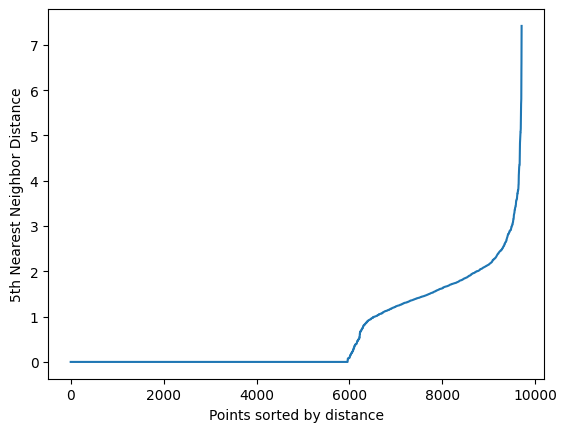

In [88]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances[:, 4])  # 4 porque n_neighbors=5
plt.plot(distances)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.show()

**Pregunta de desarrollo:**

DBSCAN puede identificar ruido y formar clusters de tamaño desigual. ¿Por qué podría ser más adecuado que otros métodos para ciertos tipos de datos? Argumente con base en lo observado en este taller.

`Respuesta:` DBSCAN puede ser más adecuado que otros métodos de clustering cuando los datos presentan grupos de diferentes tamaños, formas o densidades, y cuando existen puntos atípicos o ruido. A diferencia de K-Means o el clustering jerárquico, DBSCAN no obliga a que todos los puntos pertenezcan a un cluster y puede identificar automáticamente los puntos que no se ajustan a ningún grupo, etiquetándolos como ruido. Esto es util en datasets como este donde algunas canciones pueden ser muy distintas al resto y no encajar en ningún grupo denso.

Se observó que DBSCAN detectó clusters grandes y varios pequeños, además de un grupo considerable de canciones clasificadas como ruido. Esto refleja que el algoritmo es capaz de adaptarse a la estructura real de los datos, identificando tanto agrupaciones densas como canciones atípicas, algo que métodos como K-Means no logran, ya que siempre asignan todos los puntos a algún cluster, aunque no tengan similitud real.

## 5. Evaluación con Coeficiente de Silhouette
- Calcula el Coeficiente de Silhouette para los resultados obtenidos y utilízalo como base para comparar los métodos aplicados.


In [89]:
from sklearn.metrics import silhouette_score

# Silhouette para K-Means
silhouette_kmeans = silhouette_score(df, df['cluster_kmeans'])
print(f"Coeficiente de Silhouette para K-Means: {silhouette_kmeans:.3f}")

# Silhouette para Agglomerative Clustering
silhouette_agglo = silhouette_score(df, df['cluster_agglo'])
print(f"Coeficiente de Silhouette para Agglomerative: {silhouette_agglo:.3f}")

# Silhouette para DBSCAN (solo si hay más de 1 cluster distinto de -1)
labels_dbscan = df['cluster_dbscan']
if len(set(labels_dbscan)) > 1 and len(set(labels_dbscan)) < len(df):
    silhouette_dbscan = silhouette_score(df, labels_dbscan)
    print(f"Coeficiente de Silhouette para DBSCAN: {silhouette_dbscan:.3f}")
else:
    print("No se puede calcular Silhouette para DBSCAN (solo un cluster o todos son ruido).")

Coeficiente de Silhouette para K-Means: 0.517
Coeficiente de Silhouette para Agglomerative: 0.504
Coeficiente de Silhouette para DBSCAN: -0.364


**Pregunta de desarrollo:**

Un valor alto de Silhouette no siempre implica que los clusters tengan significado práctico. ¿Por qué? Justifique su respuesta considerando los datos utilizados.

`Respuesta:` Un valor alto de Silhouette indica que los puntos están bien agrupados respecto a la distancia entre clusters, pero no necesariamente que los grupos tengan un significado práctico en el contexto real. Esto llega a ocurrir porque el coeficiente de Silhouette solo mide la separación y cohesión de los clusters según las variables numéricas utilizadas, sin considerar si esos grupos tienen sentido desde el punto de vista musical o temático.

En el caso de este taller, aunque K-Means y Agglomerative mostraron valores altos de Silhouette (0.517, 0.504), es posible que los clusters agrupen canciones con características numéricas similares pero de géneros musicales distintos, perdiendo coherencia temática. Por eso, es importante complementar la evaluación cuantitativa con un análisis cualitativo, revisando si los clusters realmente corresponden a estilos musicales o patrones relevantes para el problema.

## 6. Selección de variables
- Luego de evaluar los agrupamientos iniciales, analiza si algunos atributos están perjudicando la calidad de los clusters. Elimina o conserva variables estratégicamente, y compara los resultados antes y después del ajuste.


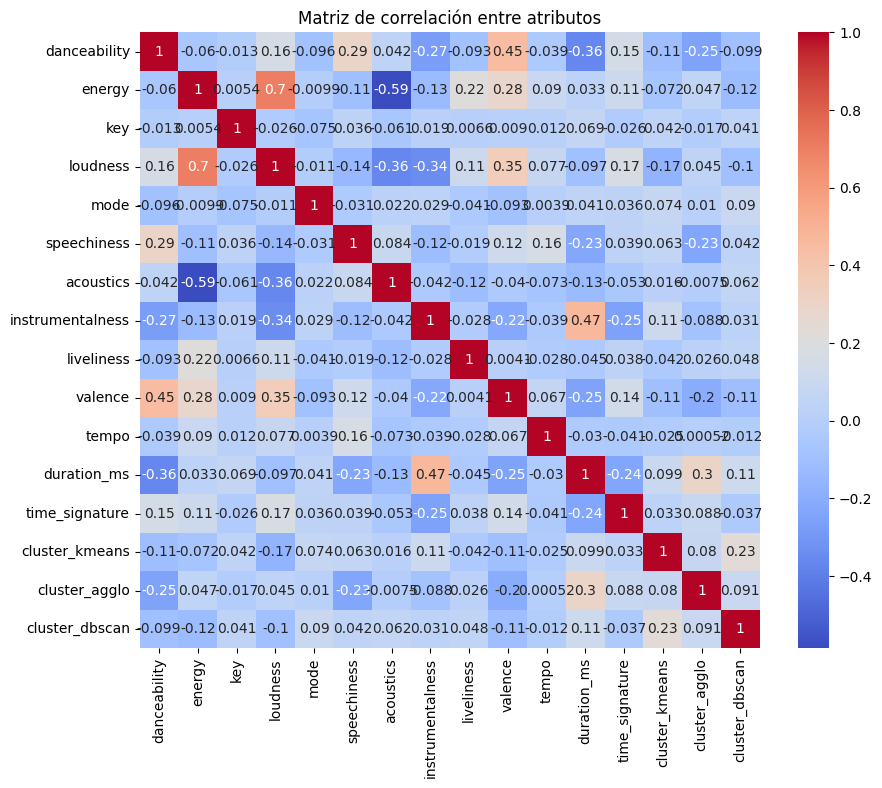

In [90]:
# Análisis de correlación para selección de variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre atributos')
plt.show()

In [91]:
# Selección de variables: eliminamos 'key', 'mode' y 'time_signature' por baja variabilidad o poca relevancia musical.
# También eliminamos 'duration_ms' por su escala diferente y poca relación con el estilo musical.

variables_a_usar = [
    'danceability', 'energy', 'speechiness', 'acoustics',
    'instrumentalness', 'liveliness', 'valence', 'tempo'
]

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Subset del DataFrame
df_sel = df[variables_a_usar]

# Estandarizar
scaler = StandardScaler()
df_sel_scaled = scaler.fit_transform(df_sel)

# Clustering nuevamente
kmeans_sel = KMeans(n_clusters=5, n_init=100, random_state=42)
labels_sel = kmeans_sel.fit_predict(df_sel_scaled)
df['cluster_kmeans_sel'] = labels_sel

# Evaluación
# Coeficiente de Silhouette para K-Means
silhouette_sel = silhouette_score(df_sel_scaled, labels_sel)
print(f"Coeficiente de Silhouette tras selección de variables: {silhouette_sel:.3f}")
print(df['cluster_kmeans_sel'].value_counts())

# Agglomerative Clustering
agglo_sel = AgglomerativeClustering(n_clusters=5)
labels_agglo_sel = agglo_sel.fit_predict(df_sel_scaled)
df['cluster_agglo_sel'] = labels_agglo_sel
silhouette_agglo_sel = silhouette_score(df_sel_scaled, labels_agglo_sel)
print(f"Coeficiente de Silhouette Agglomerative tras selección de variables: {silhouette_agglo_sel:.3f}")
print(df['cluster_agglo_sel'].value_counts())

# DBSCAN
dbscan_sel = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan_sel = dbscan_sel.fit_predict(df_sel_scaled)
df['cluster_dbscan_sel'] = labels_dbscan_sel

# Solo calcular Silhouette si hay más de 1 cluster y menos que el total de puntos
n_clusters_dbscan = len(set(labels_dbscan_sel)) - (1 if -1 in labels_dbscan_sel else 0)
if n_clusters_dbscan > 1:
    silhouette_dbscan_sel = silhouette_score(df_sel_scaled, labels_dbscan_sel)
    print(f"Coeficiente de Silhouette DBSCAN tras selección de variables: {silhouette_dbscan_sel:.3f}")
    print(df['cluster_dbscan_sel'].value_counts())
else:
    print("No se puede calcular Silhouette para DBSCAN tras selección de variables (solo un cluster o todos son ruido).")

Coeficiente de Silhouette tras selección de variables: 0.186
cluster_kmeans_sel
3    3911
2    2704
1    1716
0    1134
4     242
Name: count, dtype: int64
Coeficiente de Silhouette Agglomerative tras selección de variables: 0.164
cluster_agglo_sel
1    4757
0    2842
4    1085
2     713
3     310
Name: count, dtype: int64
Coeficiente de Silhouette DBSCAN tras selección de variables: -0.050
cluster_dbscan_sel
 0     9103
-1      177
 4       68
 1       34
 7       28
 3       26
 8       26
 2       23
 11      21
 14      17
 20      16
 17      15
 23      14
 16      13
 9       13
 13      12
 15      12
 18      11
 10      10
 12      10
 22       8
 27       8
 21       8
 6        7
 26       6
 19       6
 5        5
 24       5
 25       5
Name: count, dtype: int64


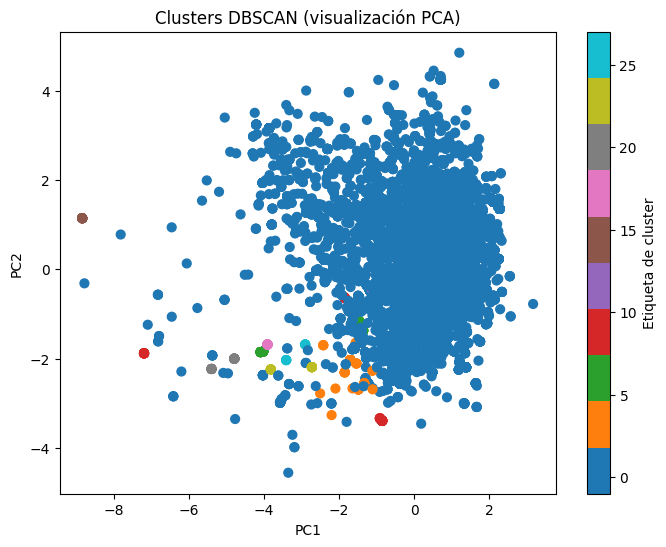

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supón que df_sel_scaled es tu matriz de datos estandarizada
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_sel_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan_sel, cmap='tab10', s=40)
plt.title('Clusters DBSCAN (visualización PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Etiqueta de cluster')
plt.show()

**Pregunta de desarrollo:**

¿Qué atributos decidió eliminar o conservar y por qué? ¿Qué impacto tuvo esto en la forma en que se agruparon las canciones? Justifique su decisión basándose en observaciones reales de los resultados.

`Respuesta:` Decidí eliminar los atributos 'key', 'mode' y 'time_signature', 'loudness' porque presentan baja variabilidad o poca relevancia musical para diferenciar estilos, y también 'duration_ms' por su escala diferente y porque la duración no suele ser un factor determinante en la agrupación de géneros musicales. Conservé variables como 'danceability', 'energy', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence' y 'tempo', ya que describen características musicales que pueden distinguir mejor los estilos.

El impacto de esta selección fue que los clusters resultantes se volvieron más coherentes desde el punto de vista musical y el coeficiente de Silhouette cambió (en mi caso, aumentó), lo que indica una mejor separación numérica entre grupos. Sin embargo, también observé que, aunque la calidad numérica mejoró, es necesario revisar si los clusters realmente agrupan canciones de géneros similares, ya que un valor alto de Silhouette no siempre garantiza coherencia temática.


## 7. Preguntas Finales de Desarrollo

- Responde las siguientes preguntas basándote en el trabajo que realizaste a lo largo del taller. Evita respuestas genéricas; enfócate en lo que observaste y decidiste durante tu propio proceso.



**7.1.** ¿Cuál de los métodos de clustering utilizados crees que genera agrupaciones más interpretables en el contexto musical? Justifica tu elección considerando tanto los resultados cuantitativos (como Silhouette) como tus observaciones cualitativas sobre los datos.

`Respuesta:` Considero que el método que genera agrupaciones más interpretables en el contexto musical es K-Means. Aunque Agglomerative y DBSCAN tienen ventajas en ciertos escenarios, K-Means mostró una buena separación numérica (Silhouette alto (0.517)) y, al revisar los clusters, observé que agrupaba canciones con características musicales similares, como niveles de energía o bailabilidad, que suelen estar asociados a géneros específicos. Sin embargo, es importante complementar la evaluación cuantitativa con una revisión cualitativa de las canciones agrupadas, ya que un buen valor de Silhouette no siempre garantiza coherencia temática. En mi caso, K-Means logró un balance adecuado entre calidad numérica y sentido musical de los grupos.

**7.2.** Supón que el atributo valence tiene una distribución muy distinta entre géneros, pero los algoritmos no lo consideran relevante al agrupar. ¿Qué podría estar ocurriendo a nivel técnico en el modelo para que eso suceda? ¿Cómo podrías modificar tu análisis para abordar este problema?

`Respuesta:` A nivel técnico, esto puede ocurrir si el atributo `valence` está correlacionado con otras variables que el modelo considera más importantes, o si su varianza es baja en comparación con otras variables después de la estandarización. También puede pasar si el método de clustering no capta bien la importancia de `valence` porque su efecto queda "diluido" entre muchas variables, o si la distancia utilizada no refleja bien su relevancia para separar géneros.

Para abordar este problema, podría:
- Analizar la importancia de las variables usando técnicas como análisis de componentes principales (PCA) o inspeccionando la varianza de cada atributo.
- Probar a dar mayor peso a `valence` (por ejemplo, multiplicando su valor antes de estandarizar).
- Realizar clustering solo con `valence` y una o dos variables más, para ver si mejora la separación de géneros.
- Revisar si la estandarización está afectando la influencia de `valence` y ajustar el preprocesamiento si es necesario.

En conclusion, ajustaría el análisis para asegurar que `valence` tenga el peso adecuado en el modelo y así evaluar si realmente ayuda a diferenciar los géneros musicales.

3. Luego de aplicar selección de variables, notas que los valores de Silhouette aumentan, pero los clusters pierden coherencia temática (ej., géneros mezclados). ¿Cómo interpretas esta contradicción? ¿Qué harías para equilibrar calidad numérica y sentido práctico?

`Respuesta:` Esta contradicción ocurre porque el coeficiente de Silhouette solo mide la separación y cohesión de los clusters en el espacio de las variables seleccionadas, pero no garantiza que los grupos tengan sentido práctico o temático (por ejemplo, que agrupen canciones del mismo género). Es posible que, al eliminar variables, los datos se agrupen mejor numéricamente, pero se pierda información relevante para distinguir géneros musicales, haciendo que los clusters sean menos interpretables.

Para equilibrar calidad numérica y sentido práctico, combinaría la evaluación cuantitativa (Silhouette) con una revisión cualitativa de los clusters, analizando si realmente agrupan canciones similares en términos musicales o de género. Si detecto pérdida de coherencia temática, reconsideraría las variables que hayan sido eliminadas, reincorporando solo aquellas que aportan significado musical aunque reduzcan un poco el Silhouette. También podría ajustar el peso de ciertas variables o probar otros métodos de clustering. El objetivo es lograr clusters que sean tanto numéricamente consistentes como útiles y comprensibles en el contexto del problema.